In [2]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [27]:
# It is considered to be better than Exponetially weighted moving avg
import numpy as np
import pandas as pd
from datetime import datetime
%matplotlib inline


In [28]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

In [36]:
df = pd.read_csv('../../Time-series-analysis/Data/airline_passengers.csv',index_col='Month', parse_dates=True)

In [37]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [38]:
df.index.freq = 'MS'

In [39]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [40]:
# We will predict the furture data
train_data = df.iloc[:109]
test_data = df.iloc[108:]

In [41]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [49]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

C:\Users\ArnabBiswas\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [50]:
test_predictions = fitted_model.forecast(36)

In [51]:
test_predictions

1958-02-01    339.142929
1958-03-01    399.281670
1958-04-01    394.233619
1958-05-01    402.545275
1958-06-01    473.128728
1958-07-01    521.795288
1958-08-01    514.513579
1958-09-01    446.216813
1958-10-01    385.430963
1958-11-01    339.645115
1958-12-01    381.455698
1959-01-01    401.210195
1959-02-01    387.159205
1959-03-01    455.812464
1959-04-01    450.049704
1959-05-01    459.538134
1959-06-01    540.114880
1959-07-01    595.671712
1959-08-01    587.359050
1959-09-01    509.392742
1959-10-01    440.000757
1959-11-01    387.732492
1959-12-01    435.462668
1960-01-01    458.014032
1960-02-01    441.973686
1960-03-01    520.346958
1960-04-01    513.768299
1960-05-01    524.600113
1960-06-01    616.585015
1960-07-01    680.007652
1960-08-01    670.518073
1960-09-01    581.513199
1960-10-01    502.296610
1960-11-01    442.628139
1960-12-01    497.116013
1961-01-01    522.860226
Freq: MS, dtype: float64

<Axes: xlabel='Month'>

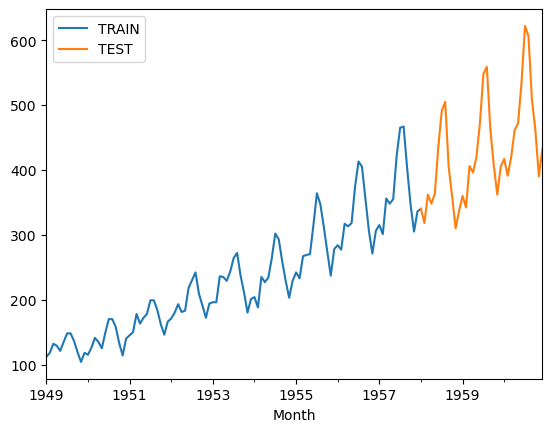

In [52]:
train_data['Thousands of Passengers'].plot(legend=True, label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True, label='TEST')

<Axes: xlabel='Month'>

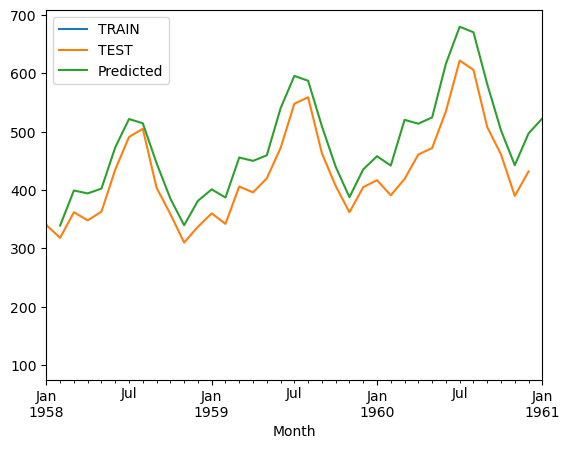

In [54]:
train_data['Thousands of Passengers'].plot(legend=True, label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True, label='TEST')
test_predictions.plot(legend=True,label='Predicted', xlim=['1958-01-01','1961-01-01'])

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [56]:
mean_absolute_error(test_data,test_predictions)

63.031171575091825

In [58]:
# mean_absolute_error is much less than the mean of test data. Which is a good sign.
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [59]:
# It is also less than standard deviation. Which is also good.
np.sqrt(mean_squared_error(test_data,test_predictions))

74.92841072754705